In [2]:
%matplotlib ipympl

In [3]:
from functools import reduce

import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sympy import *

In [4]:
def KE_vec(vec, m):
    return 0.5 * m * sum(diff(i, t) ** 2 for i in vec)


def PE_vec(vec, m, h=2):
    return g * vec[h] * m

In [5]:
m1, m2, L1, L2, t = symbols("m_1 m_2 L_1 L_2 t")
m = [m1, m2]
g = 9.8
theta1 = Function("θ_1")(t)
theta2 = Function("θ_2")(t)
S = [theta1, theta2]

points = [
    Matrix([L1 * cos(theta1), L1 * sin(theta1)]),
    Matrix(
        [
            L1 * cos(theta1) + L2 * cos(theta1 + theta2),
            L1 * sin(theta1) + L2 * sin(theta1 + theta2),
        ]
    ),
]

T = sum([KE_vec(point, mp) for point, mp in zip(points, m)])
U = sum([PE_vec(point, mp, h=1) for point, mp in zip(points, m)])
L = T - U
torques = Matrix([diff(diff(L, diff(s, t)), t) - diff(L, s) for s in S])

simplify(torques)

Matrix([
[1.0*L_1**2*m_1*Derivative(θ_1(t), (t, 2)) + 9.8*L_1*m_1*cos(θ_1(t)) + 9.8*m_2*(L_1*cos(θ_1(t)) + L_2*cos(θ_1(t) + θ_2(t))) + 1.0*m_2*(L_1**2*Derivative(θ_1(t), (t, 2)) - 2*L_1*L_2*sin(θ_2(t))*Derivative(θ_1(t), t)*Derivative(θ_2(t), t) - L_1*L_2*sin(θ_2(t))*Derivative(θ_2(t), t)**2 + 2*L_1*L_2*cos(θ_2(t))*Derivative(θ_1(t), (t, 2)) + L_1*L_2*cos(θ_2(t))*Derivative(θ_2(t), (t, 2)) + L_2**2*Derivative(θ_1(t), (t, 2)) + L_2**2*Derivative(θ_2(t), (t, 2)))],
[                                                                                                                                                                                                                                                           L_2*m_2*(1.0*L_1*sin(θ_2(t))*Derivative(θ_1(t), t)**2 + 1.0*L_1*cos(θ_2(t))*Derivative(θ_1(t), (t, 2)) + 1.0*L_2*Derivative(θ_1(t), (t, 2)) + 1.0*L_2*Derivative(θ_2(t), (t, 2)) + 9.8*cos(θ_1(t) + θ_2(t)))]])

In [6]:
m = [5, 4, 2]
g = 9.8
t = symbols("t")
theta1 = Function("θ_1")(t)
theta2 = Function("θ_2")(t)
d_3 = Function("d_3")(t)
S = [theta1, theta2, d_3]

points = [
    Matrix([0.5 * cos(theta1), 0.5 * sin(theta1), 1]),
    Matrix(
        [
            0.5 * cos(theta1) + 0.5 * cos(theta1 + theta2),
            0.5 * sin(theta1) + 0.5 * sin(theta1 + theta2),
            1,
        ]
    ),
    Matrix(
        [
            0.5 * cos(theta1) + 0.5 * cos(theta1 + theta2),
            0.5 * sin(theta1) + 0.5 * sin(theta1 + theta2),
            1 - d_3,
        ]
    ),
]

T = sum([KE_vec(point, mp) for point, mp in zip(points, m)])
U = sum([PE_vec(point, mp, h=2) for point, mp in zip(points, m)])
L = T - U
torques = Matrix([diff(diff(L, diff(s, t)), t) - diff(L, s) for s in S])
simplify(torques)

Matrix([
[-3.0*sin(θ_2(t))*Derivative(θ_1(t), t)*Derivative(θ_2(t), t) - 1.5*sin(θ_2(t))*Derivative(θ_2(t), t)**2 + 3.0*cos(θ_2(t))*Derivative(θ_1(t), (t, 2)) + 1.5*cos(θ_2(t))*Derivative(θ_2(t), (t, 2)) + 4.25*Derivative(θ_1(t), (t, 2)) + 1.5*Derivative(θ_2(t), (t, 2))],
[                                                                                                             1.5*sin(θ_2(t))*Derivative(θ_1(t), t)**2 + 1.5*cos(θ_2(t))*Derivative(θ_1(t), (t, 2)) + 1.5*Derivative(θ_1(t), (t, 2)) + 1.5*Derivative(θ_2(t), (t, 2))],
[                                                                                                                                                                                                                               2.0*Derivative(d_3(t), (t, 2)) - 19.6]])

In [7]:
# def DH(theta, d, a, alpha):
#     return Matrix(
#         [
#             [cos(theta), -sin(theta), 0, a],
#             [
#                 sin(theta) * cos(alpha),
#                 cos(theta) * cos(alpha),
#                 -sin(alpha),
#                 -sin(alpha) * d,
#             ],
#             [
#                 sin(theta) * sin(alpha),
#                 cos(theta) * sin(alpha),
#                 cos(alpha),
#                 cos(alpha) * d,
#             ],
#             [0, 0, 0, 1],
#         ]
#     )
def DH(theta, d, a, alpha):
    return Matrix(
        [
            [
                cos(theta),
                -sin(theta) * cos(alpha),
                sin(theta) * sin(alpha),
                a * cos(theta),
            ],
            [
                sin(theta),
                cos(theta) * cos(alpha),
                -cos(theta) * sin(alpha),
                a * sin(theta),
            ],
            [0, sin(alpha), cos(alpha), d],
            [0, 0, 0, 1],
        ]
    )

In [8]:
def fk(theta1, theta2, d3):
    return [
        0.5 * cos(theta1) + 0.5 * cos(theta1 + theta2),
        0.5 * sin(theta1) + 0.5 * sin(theta1 + theta2),
        1 - d3,
    ]

In [9]:
def ik(x, y, z):
    c2 = (x**2 + y**2 - 0.5**2 - 0.5**2) / (2 * 0.5**2)
    s2 = sqrt(1 - c2**2)
    th1 = atan2(x, y) - atan2(0.5 + 0.5 * c2, 0.5 * s2)
    th2 = acos(2 * (x**2 + y**2) - 1)
    d = 1 - z
    return [th1, th2, d]

In [10]:
theta1, theta2, theta4, d3 = symbols(r"θ_1 θ_2 θ_4 d_3")
s = [theta1, theta2, d3, theta4]

In [11]:
joints = [
    [0, 1, 0, 0],
    [theta1, 0, 0.5, 0],
    [theta2, 0, 0.5, 0],
    [0, -d3, 0, 0],
    [theta4, 0, 0, 0],
]
# theta, d, a, alpha

In [12]:
simplify(reduce(lambda x, y: x @ y, [DH(*x) for x in joints]))

Matrix([
[cos(θ_1 + θ_2 + θ_4), -sin(θ_1 + θ_2 + θ_4), 0, 0.5*cos(θ_1) + 0.5*cos(θ_1 + θ_2)],
[sin(θ_1 + θ_2 + θ_4),  cos(θ_1 + θ_2 + θ_4), 0, 0.5*sin(θ_1) + 0.5*sin(θ_1 + θ_2)],
[                   0,                     0, 1,                           1 - d_3],
[                   0,                     0, 0,                                 1]])

In [19]:
q = simplify(
    reduce(lambda x, y: x @ y, [DH(*x) for x in joints]) @ Matrix([[0], [0], [0], [1]])
)[0:3]
J = Matrix(list(zip(*[list(diff(Matrix(q), i)) for i in s[0:3]])))
simplify(J.inv())

Matrix([
[                  2.0*cos(θ_1 + θ_2)/sin(θ_2),                   2.0*sin(θ_1 + θ_2)/sin(θ_2),  0],
[-(2.0*cos(θ_1) + 2.0*cos(θ_1 + θ_2))/sin(θ_2), -(2.0*sin(θ_1) + 2.0*sin(θ_1 + θ_2))/sin(θ_2),  0],
[                                            0,                                             0, -1]])

In [14]:
pt = Matrix([[0], [0], [0], [1]])
pts = [
    reduce(lambda x, y: x @ y, [DH(*joints[j]) for j in range(i + 1)]) @ pt
    for i in range(len(joints))
]

In [15]:
def f(t1, t2, t3, t4, n):
    return [
        i
        for i in simplify(pts[n])
        .subs([(theta1, t1), (theta2, t2), (d3, t3), (theta4, t4)])
        .evalf()
    ][0:3]

https://surajkiron.github.io/posts/7_Manipulator_Kinematics/index.html


https://airccse.org/journal/ijsc/papers/2411ijsc06.pdf

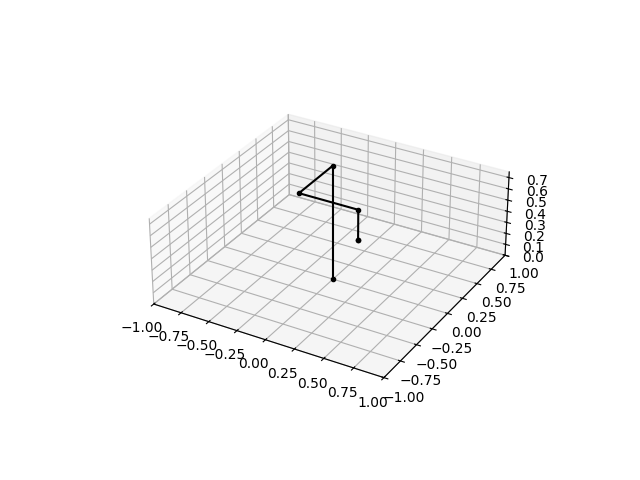

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

p = [[0, 0, 0]] + [f(3 * pi / 2, pi / 2, 0.25, 0, i) for i in range(len(joints))]

x_values = [i[0] for i in p]
y_values = [i[1] for i in p]
z_values = [i[2] for i in p]

ax.plot(x_values, y_values, z_values, marker=".", color="k")

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([0, 0.75])

ax.grid(True)

ax.set_box_aspect([2, 2, 0.75])

plt.show()